In [ ]:
# we will need these packages that you download from Bioconductor('maftools') and CRAN ('readr', 'NMF')
library(readr)
library(NMF)
library(maftools)

# change this path according to where you created the folder
#dataPath <- "C:/-=TRANSMED=-/course materials/teaching/BIOINF17/ex1/bioinf/" 
fileList <- list.files( paste0("gdac.broadinstitute.org_OV.Mutation_Packager_Oncotated_Calls.Level_3.2016012800.0.0/"))

# this is to remove the manifest file from the list
fileList <- fileList[ fileList != "MANIFEST.txt"] 

# let's create an empty list and then populate it with the files
mafList <- list()
for (i in seq_along(fileList)) 
  mafList[[i]] <- read_tsv( paste0( 
                "gdac.broadinstitute.org_OV.Mutation_Packager_Oncotated_Calls.Level_3.2016012800.0.0/",
                fileList[i]) ,comment = "#", progress = F)

#now let's aggregate the list into one data frame
maf.df <- as.data.frame(do.call(rbind, mafList))
head(maf.df)

In [42]:
# You can check here and appreciate how many possible annotations one can get
# We will choose specific columns only for ease of use

selectedColumns <- c( "Hugo_Symbol", "Center", "NCBI_Build", "Chromosome",
                      "Start_position", "End_position", "Variant_Classification",
                      "Variant_Type", "Tumor_Sample_Barcode", "Mutation_Status", 
                      "Reference_Allele", "Tumor_Seq_Allele1", "Tumor_Seq_Allele2",
                      "Protein_Change", "i_dbNSFP_CADD_phred")

maf.df <- maf.df[, selectedColumns]


In [43]:
# Let's keep only mutations marked as somatic or unknown and 
# store the rest in separate data.frame
maf.germline.df <- maf.df[! maf.df$Mutation_Status %in% c("Somatic","Unknown"), ]
maf.df <- maf.df[ maf.df$Mutation_Status %in% c("Somatic","Unknown"), ]

# let's see the structure of data frame
str(maf.df)

'data.frame':	20160 obs. of  15 variables:
 $ Hugo_Symbol           : chr  "BAI2" "LRRC41" "ERICH3" "SSX2IP" ...
 $ Center                : chr  "broad.mit.edu" "broad.mit.edu" "broad.mit.edu" "broad.mit.edu" ...
 $ NCBI_Build            : int  37 37 37 37 37 37 37 37 37 37 ...
 $ Chromosome            : chr  "1" "1" "1" "1" ...
 $ Start_position        : int  32202221 46751997 75055494 85128152 107866918 153274927 157516843 224321795 248343719 28023684 ...
 $ End_position          : int  32202221 46751997 75055494 85128152 107866918 153274927 157516843 224321795 248343719 28023684 ...
 $ Variant_Classification: chr  "Missense_Mutation" "Missense_Mutation" "Missense_Mutation" "Silent" ...
 $ Variant_Type          : chr  "SNP" "SNP" "SNP" "SNP" ...
 $ Tumor_Sample_Barcode  : chr  "TCGA-04-1331-01" "TCGA-04-1331-01" "TCGA-04-1331-01" "TCGA-04-1331-01" ...
 $ Mutation_Status       : chr  "Unknown" "Somatic" "Unknown" "Somatic" ...
 $ Reference_Allele      : chr  "C" "C" "T" "A" ...
 $ Tum

In [44]:
head(maf.df)

Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Tumor_Sample_Barcode,Mutation_Status,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Protein_Change,i_dbNSFP_CADD_phred
BAI2,broad.mit.edu,37,1,32202221,32202221,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,C,C,G,p.R1028P,17.93
LRRC41,broad.mit.edu,37,1,46751997,46751997,Missense_Mutation,SNP,TCGA-04-1331-01,Somatic,C,C,T,p.E178K,28.5
ERICH3,broad.mit.edu,37,1,75055494,75055494,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,T,T,G,p.E666A,12.41
SSX2IP,broad.mit.edu,37,1,85128152,85128152,Silent,SNP,TCGA-04-1331-01,Somatic,A,A,G,p.G245G,NA
NTNG1,broad.mit.edu,37,1,107866918,107866918,Missense_Mutation,SNP,TCGA-04-1331-01,Somatic,G,G,A,p.M87I,19.40
PGLYRP3,broad.mit.edu,37,1,153274927,153274927,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,G,G,T,p.S229Y,14.61


In [45]:
tail(maf.df)


,Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Tumor_Sample_Barcode,Mutation_Status,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Protein_Change,i_dbNSFP_CADD_phred
20214,C9orf78,broad.mit.edu,37,9,132597484,132597484,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,T,T,G,p.K6T,13.48
20215,CAMSAP1,broad.mit.edu,37,9,138714002,138714002,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,C,p.S835R,22.6
20216,NOTCH1,broad.mit.edu,37,9,139391081,139391081,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,T,p.S2370R,12.84
20217,DPP7,broad.mit.edu,37,9,140007856,140007856,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,A,p.A193V,17.85
20218,FAM47A,broad.mit.edu,37,X,34149721,34149721,Silent,SNP,TCGA-61-2113-01,Unknown,C,C,T,p.P225P,NA
20219,B3GNT7,broad.mit.edu,37,2,232263379,232263380,In_Frame_Ins,INS,TCGA-61-2113-01,Unknown,-,-,GCG,p.317_318insG,NA


In [13]:
write.table(maf.df, file = paste0("allSamplesMaf.maf"),
            col.names = T, row.names = F, quote = F, sep="\t")


maf <- read.maf(maf = paste0("allSamplesMaf.maf"),
                removeSilent = T, useAll = T , verbose = F)

reading maf..
Done !


##### Task 1: Mutation analysis

##### What is the median mutation rate per megabase assuming an approximate exome size of 33 megabases? Tip: if you are using the maf object, you need to read it again including silent mutations, it’s easier to use maf.df here.

##### solution

In [47]:
#useful col for this analaysis will be Tumor_Sample_Barcode
median(table(maf.df$Tumor_Sample_Barcode)/33)

[1] 1.69697

##### Make an oncoplot of the top mutated 15 genes. How many and which of them are reported by the TCGA paper as driver genes? Can you explain why frequency alone is not an efficient method?

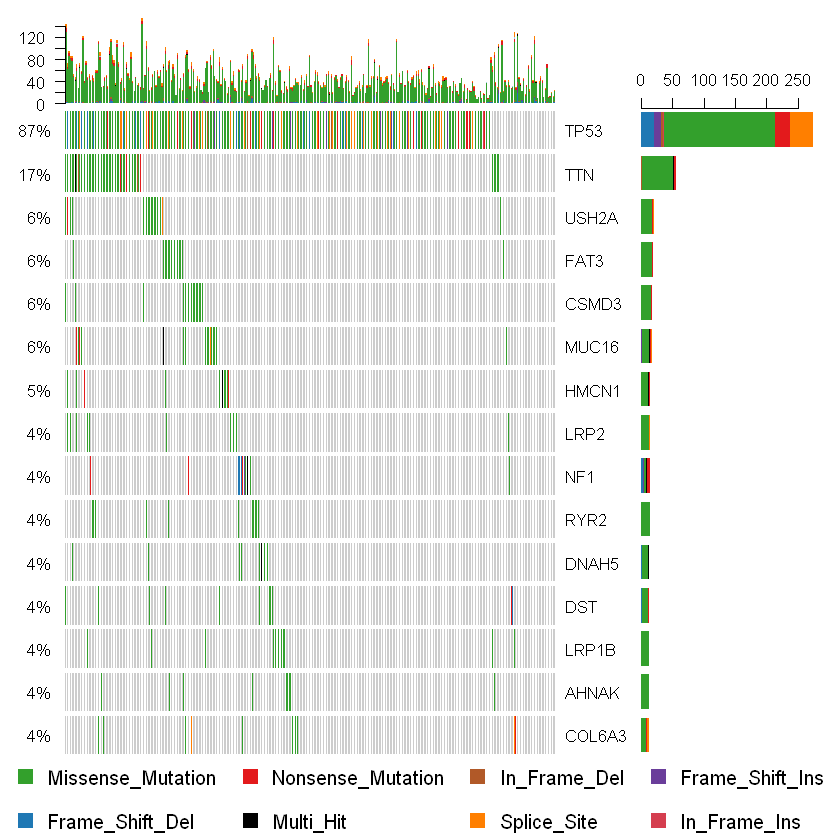

In [48]:
oncoplot(maf = maf, top = 15)

##### Make lolliplots for TP53, NF1 and RB1. What does the distribution of mutations suggest?

Removed 31 mutations for which AA position was not available


    Variant_Type Variant_Classification AAChange conv pos
 1:          SNP            Splice_Site       NA   NA  NA
 2:          SNP            Splice_Site       NA   NA  NA
 3:          SNP            Splice_Site       NA   NA  NA
 4:          SNP            Splice_Site       NA   NA  NA
 5:          SNP            Splice_Site       NA   NA  NA
 6:          SNP            Splice_Site       NA   NA  NA
 7:          SNP            Splice_Site       NA   NA  NA
 8:          SNP            Splice_Site       NA   NA  NA
 9:          SNP            Splice_Site       NA   NA  NA
10:          SNP            Splice_Site       NA   NA  NA
11:          SNP            Splice_Site       NA   NA  NA
12:          SNP            Splice_Site       NA   NA  NA
13:          SNP            Splice_Site       NA   NA  NA
14:          SNP            Splice_Site       NA   NA  NA
15:          SNP            Splice_Site       NA   NA  NA
16:          SNP            Splice_Site       NA   NA  NA
17:          S

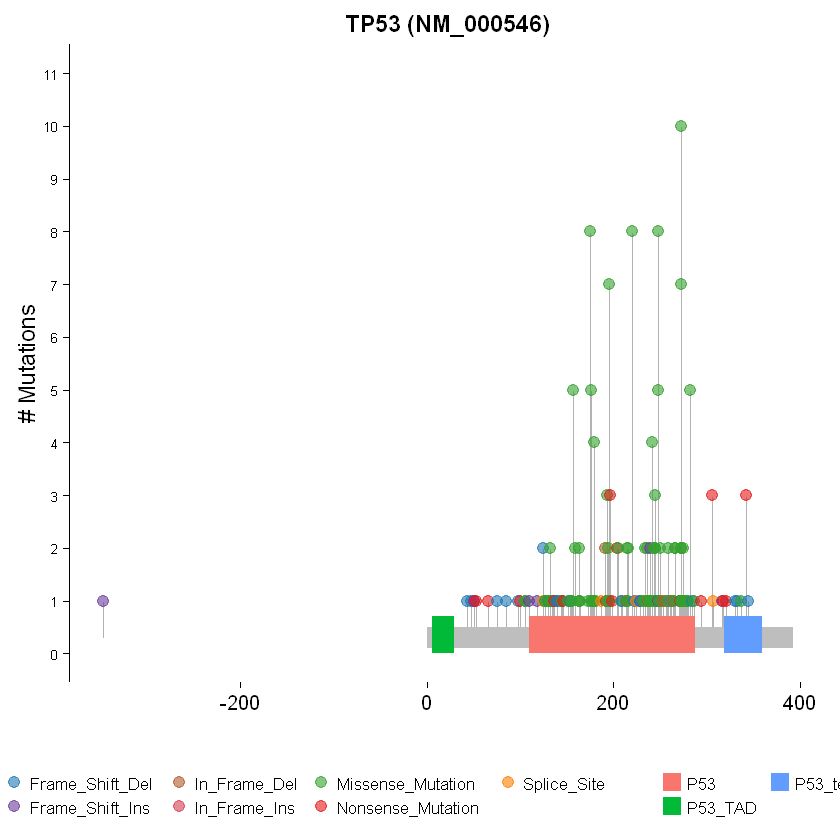

In [49]:
plots_TP53 <- lollipopPlot(maf = maf, gene = 'TP53', AACol = "Protein_Change", refSeqID = "NM_000546")

Removed 1 mutations for which AA position was not available


   Variant_Type Variant_Classification AAChange conv pos
1:          SNP            Splice_Site       NA   NA  NA


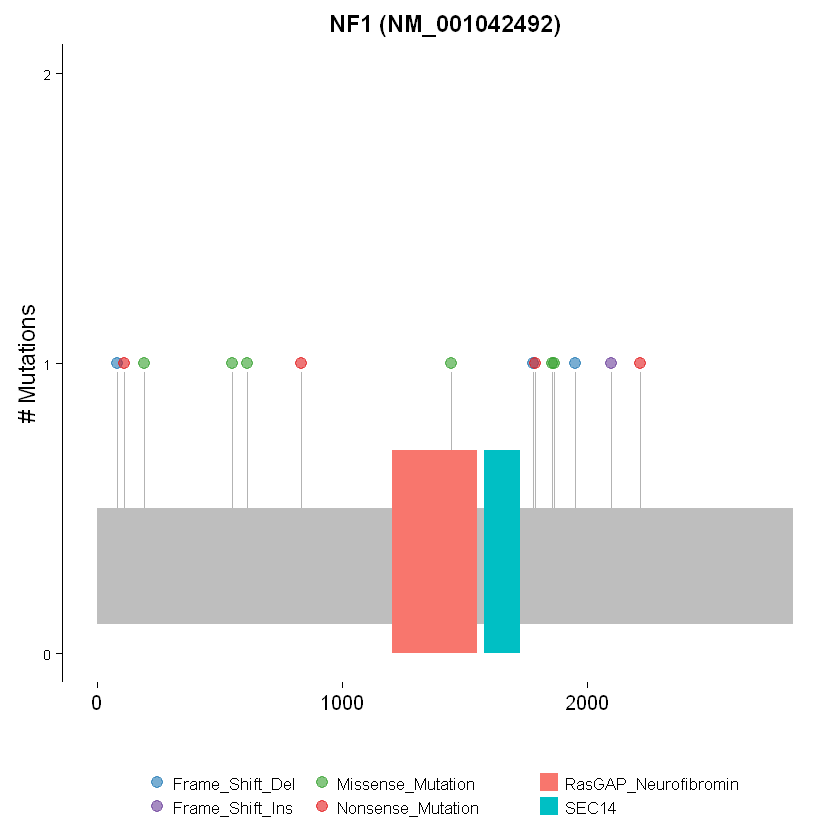

In [50]:
plot_NF1 <- lollipopPlot(maf = maf, gene = 'NF1', AACol = "Protein_Change", refSeqID = "NM_001042492")

Removed 1 mutations for which AA position was not available


   Variant_Type Variant_Classification AAChange conv pos
1:          SNP            Splice_Site       NA   NA  NA


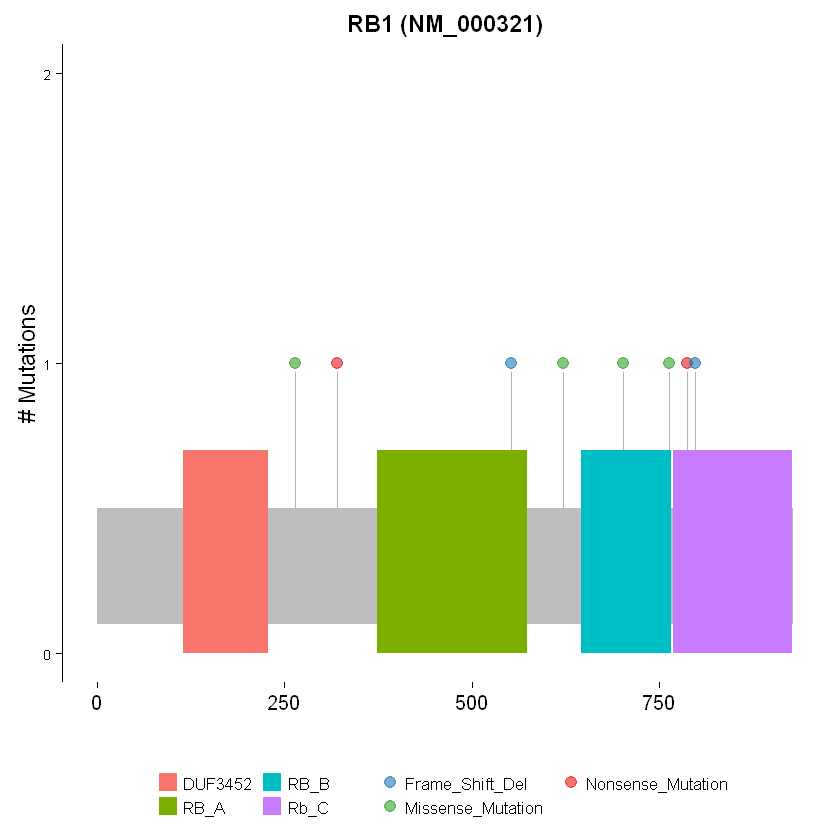

In [51]:
plot_RB1 <- lollipopPlot(maf = maf, gene = 'RB1', AACol = "Protein_Change", refSeqID = "NM_000321")

##### How many patients have non-silent mutations in either BRCA1 or BRCA2 including germline variants?

In [53]:
# check BRCA1 or BRCA2 if they are  non-silent  and calculate the length 
table(maf.df[maf.df[,1] %in% c("BRCA1","BRCA2"),"Variant_Classification"])



  Frame_Shift_Del   Frame_Shift_Ins Missense_Mutation Nonsense_Mutation 
                7                 2                 3                 6 

In [56]:
table(maf.germline.df[maf.germline.df[,1] %in% c("BRCA1","BRCA2"),"Variant_Classification"])

< table of extent 0 >

In [55]:
length(unique( c(maf.df[maf.df$Hugo_Symbol %in% c("BRCA1","BRCA2"), "Tumor_Sample_Barcode" ],
                  maf.germline.df[ maf.germline.df$Hugo_Symbol %in% c("BRCA1","BRCA2"), "Tumor_Sample_Barcode" ])))

[1] 18

##### Compare CADD scores between Silent, Missense_Mutation, Nonsense_Mutation and Splice_Site mutations (a boxplot is good way). Which type has the highest scores on average and which has the lowest scores?

In [57]:
types <- c("Nonsense_Mutation","Splice_Site","Missense_Mutation","Silent")

In [75]:
maf.types <- maf.df[maf.df$Variant_Classification %in% types,]
head(maf.types)
tail(maf.types)

Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Tumor_Sample_Barcode,Mutation_Status,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Protein_Change,i_dbNSFP_CADD_phred
BAI2,broad.mit.edu,37,1,32202221,32202221,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,C,C,G,p.R1028P,17.93
LRRC41,broad.mit.edu,37,1,46751997,46751997,Missense_Mutation,SNP,TCGA-04-1331-01,Somatic,C,C,T,p.E178K,28.5
ERICH3,broad.mit.edu,37,1,75055494,75055494,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,T,T,G,p.E666A,12.41
SSX2IP,broad.mit.edu,37,1,85128152,85128152,Silent,SNP,TCGA-04-1331-01,Somatic,A,A,G,p.G245G,NA
NTNG1,broad.mit.edu,37,1,107866918,107866918,Missense_Mutation,SNP,TCGA-04-1331-01,Somatic,G,G,A,p.M87I,19.40
PGLYRP3,broad.mit.edu,37,1,153274927,153274927,Missense_Mutation,SNP,TCGA-04-1331-01,Unknown,G,G,T,p.S229Y,14.61


,Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Tumor_Sample_Barcode,Mutation_Status,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Protein_Change,i_dbNSFP_CADD_phred
20213,ZNF79,broad.mit.edu,37,9,130207146,130207146,Silent,SNP,TCGA-61-2113-01,Unknown,C,C,T,p.Y389Y,NA
20214,C9orf78,broad.mit.edu,37,9,132597484,132597484,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,T,T,G,p.K6T,13.48
20215,CAMSAP1,broad.mit.edu,37,9,138714002,138714002,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,C,p.S835R,22.6
20216,NOTCH1,broad.mit.edu,37,9,139391081,139391081,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,T,p.S2370R,12.84
20217,DPP7,broad.mit.edu,37,9,140007856,140007856,Missense_Mutation,SNP,TCGA-61-2113-01,Unknown,G,G,A,p.A193V,17.85
20218,FAM47A,broad.mit.edu,37,X,34149721,34149721,Silent,SNP,TCGA-61-2113-01,Unknown,C,C,T,p.P225P,NA


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

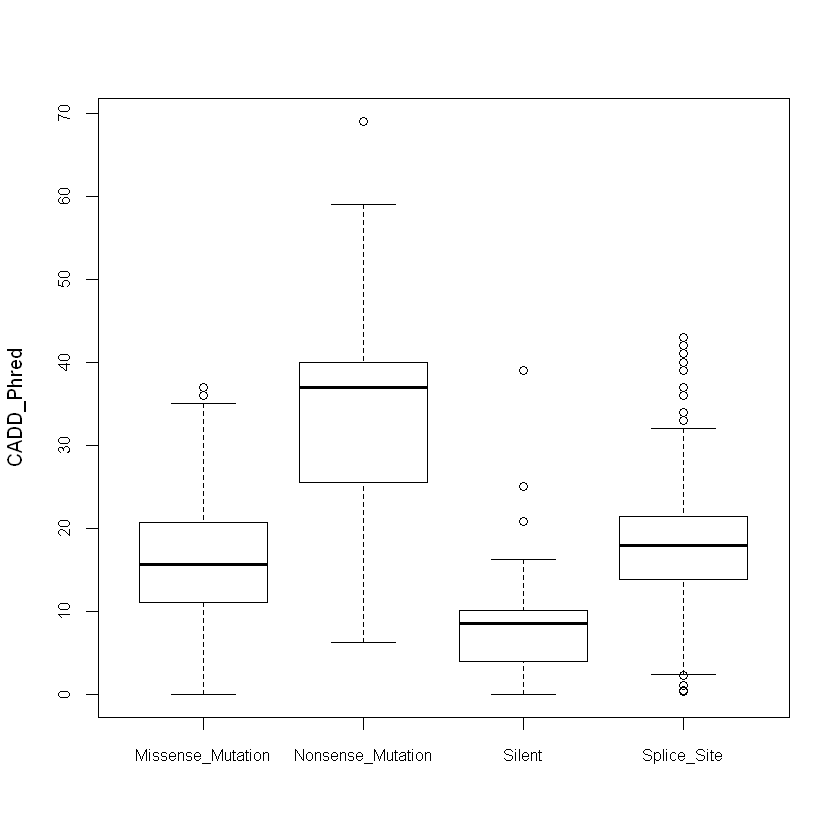

In [60]:
#compare the types using boxplot
boxplot(as.numeric(maf.types$i_dbNSFP_CADD_phred) ~ maf.types$Variant_Classification,
        ylab = "CADD_Phred", cex.axis = .8)

#### Task 2

In [61]:
# read the input file and see the structure 
arm_data <- read.delim(paste0(
                            "gdac.broadinstitute.org_OV-TP.CopyNumber_Gistic2.Level_4.2016012800.0.0/",
                            "broad_significance_results.txt"), stringsAsFactors = F)

str(arm_data)

'data.frame':	41 obs. of  8 variables:
 $ Arm          : chr  "1p" "1q" "2p" "2q" ...
 $ X..Genes     : int  1300 1195 624 967 644 733 289 670 183 905 ...
 $ Amp.frequency: num  0.32 0.4 0.34 0.28 0.31 0.5 0.21 0.14 0.38 0.15 ...
 $ Amp.z.score  : num  2.44 5.75 -1.25 -1.71 -2.27 7.23 -6.5 -6.56 -1.81 -7.06 ...
 $ Amp.q.value  : num  3.76e-02 5.93e-08 1.00 1.00 1.00 ...
 $ Del.Frequency: num  0.17 0.14 0.16 0.17 0.26 0.19 0.61 0.66 0.43 0.45 ...
 $ Del.z.score  : num  -4.95 -6.44 -8.55 -6.89 -4.32 -6.17 9.49 14.9 0.123 5.84 ...
 $ Del.q.value  : num  1.00 1.00 1.00 1.00 1.00 1.00 0.00 0.00 7.11e-01 6.40e-09 ...


In [69]:
# This file has threshold copy number for each sample in each gene
# First column has the gene name, second has entrez ID and third had the cytoband
# the rest of the columns include the copy number value per sample
# 2: high-level amplification, 1: gain, 0: normal, -1: loss, -2: homozygous deletion

genecopyNumber <- read.delim(paste0(
                            "gdac.broadinstitute.org_OV-TP.CopyNumber_Gistic2.Level_4.2016012800.0.0/",
                             "all_thresholded.by_genes.txt"), stringsAsFactors = F, check.names = F)

head(genecopyNumber[,1:5])

Gene Symbol,Locus ID,Cytoband,TCGA-04-1331-01A-01D-0428-01,TCGA-04-1332-01A-01D-0428-01
ACAP3,116983,1p36.33,-1,0
ACTRT2,140625,1p36.32,-1,0
AGRN,375790,1p36.33,-1,0
ANKRD65,441869,1p36.33,-1,0
ATAD3A,55210,1p36.33,-1,0
ATAD3B,83858,1p36.33,-1,0


##### How many chromosome arms are recurrently amplified and deleted with significant q-value?

In [73]:
#check how many chromosome arms have amplification q-value < 0.05 and how many have deletion q-value < 0.05
print(arm_data[ arm_data$Amp.q.value < 0.05, 1])

[1] "1p"  "1q"  "3q"  "7q"  "8q"  "12p" "20p" "20q"


In [66]:
length(arm_data[ arm_data$Amp.q.value < 0.05, 1])

[1] 8

In [74]:
print(arm_data[ arm_data$Del.q.value < 0.05, 1])

 [1] "4p"  "4q"  "5q"  "6p"  "6q"  "8p"  "9p"  "9q"  "13q" "14q" "15q" "16p"
[13] "16q" "17p" "17q" "18p" "18q" "19p" "19q" "22q" "Xp"  "Xq" 


In [68]:
length(arm_data[ arm_data$Del.q.value < 0.05, 1])

[1] 22

##### How many samples have high-level amplification (value = 2) in CCNE1?

In [70]:
#count the alterations in CCNE1, RB1 and NF1
#keys=> 2: high-level amplification, 1: gain, 0: normal, -1: loss, -2: homozygous deletion

#high-level amplification in CCNE1
table(as.numeric(genecopyNumber[ genecopyNumber[,1] == "CCNE1", -c(1:3)]))


 -1   0   1   2 
 51 205 198 125 

##### How many samples have homozygous deletions (value = -2) in each of NF1 and RB1 ?

In [71]:
#homozygous deletion in RB1

table(as.numeric(genecopyNumber[ genecopyNumber[,1] == "RB1", -c(1:3)]))


 -2  -1   0   1   2 
 51 321 137  66   4 

In [72]:
#homozygous deletion in NF1
table(as.numeric(genecopyNumber[ genecopyNumber[,1] == "NF1", -c(1:3)]))


 -2  -1   0   1   2 
 40 438  75  25   1 